## Research of prices volatility between ETH-BTC pair

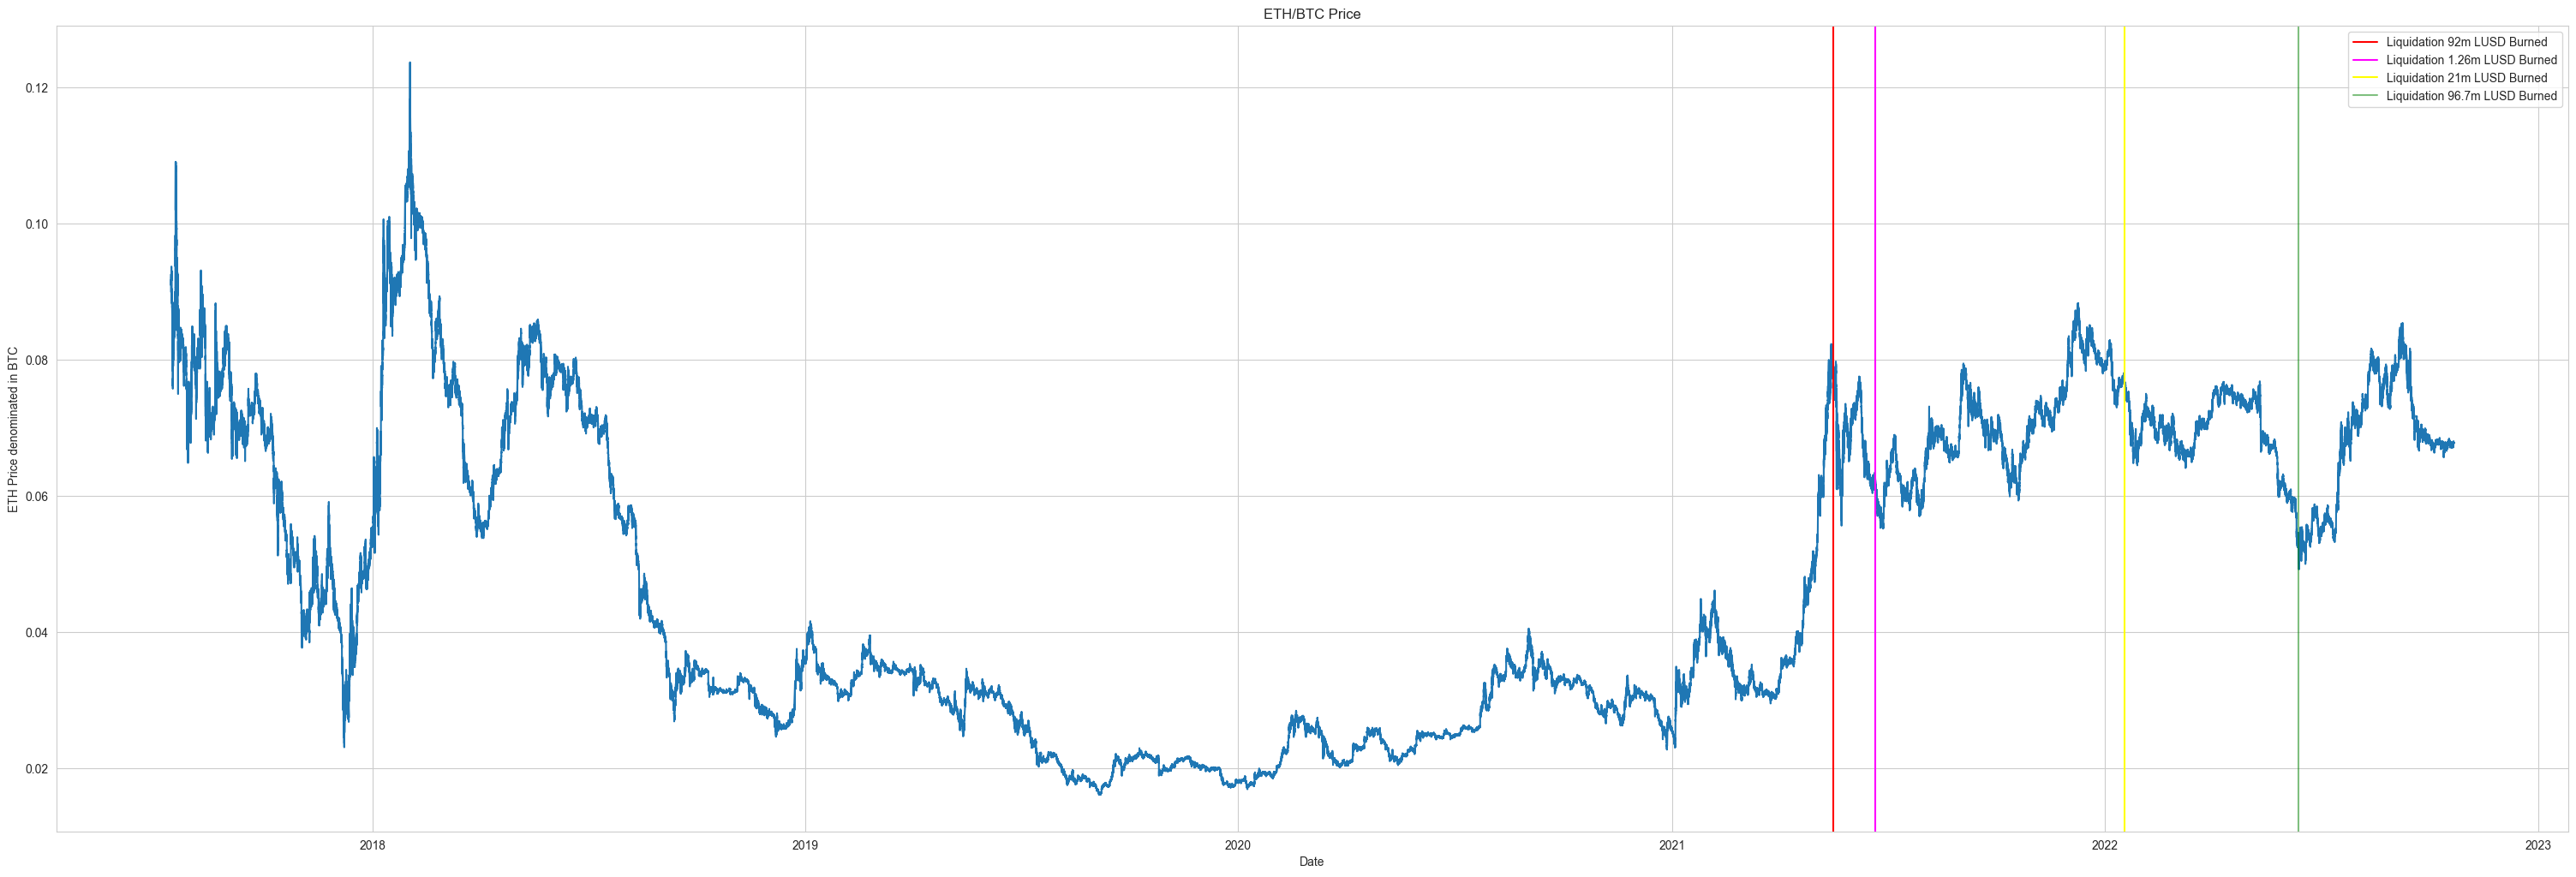

In [113]:
from datetime import date
from math import sqrt

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = 30, 10

df_ethbtc = pd.read_parquet("ETH-BTC.parquet")
# Remove 14th of July because data is not complete for this day
df_ethbtc=df_ethbtc[df_ethbtc.index.date != date(year=2017, month=7, day=14)]
fig, ax = plt.subplots()
fig.tight_layout()

ax.plot(df_ethbtc.reset_index()['open_time'].tolist(), df_ethbtc['close'].tolist())
ax.axvline(pd.Timestamp('2021-05-17'),color='red', alpha=1, label='Liquidation 92m LUSD Burned')
ax.axvline(pd.Timestamp('2021-06-21'),color='magenta', alpha=1, label='Liquidation 1.26m LUSD Burned')
ax.axvline(pd.Timestamp('2022-01-17'),color='yellow', alpha=1, label='Liquidation 21m LUSD Burned')
ax.axvline(pd.Timestamp('2022-06-13'),color='green', alpha=.5, label='Liquidation 96.7m LUSD Burned')
ax.set_title('ETH/BTC Price')
ax.set_ylabel('ETH Price denominated in BTC')
ax.set_xlabel('Date')
ax.legend()
plt.show()

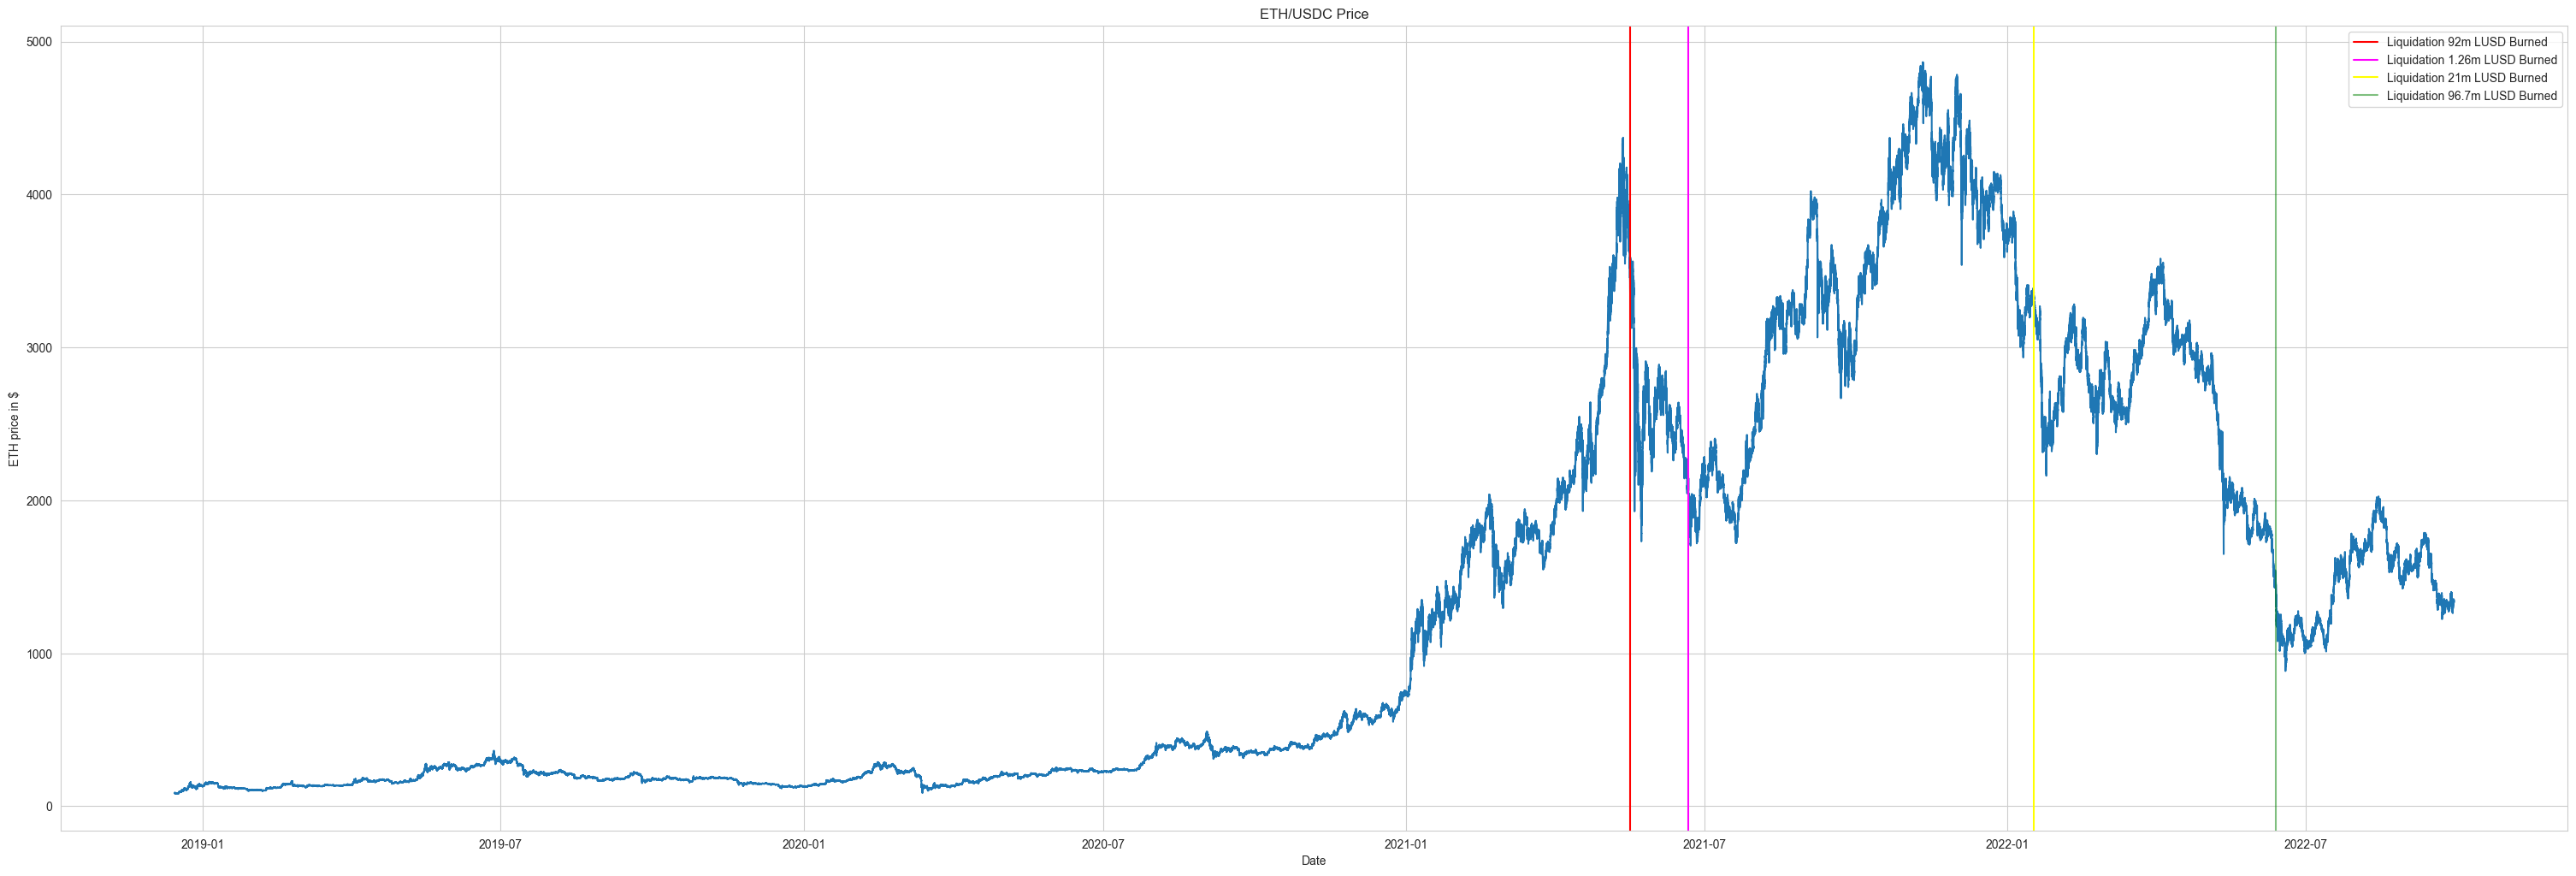

In [114]:
df_ethusdc = pd.read_parquet("ETH-USDC.parquet")

fig, ax = plt.subplots()
fig.tight_layout()

ax.plot(df_ethusdc.reset_index()['open_time'].tolist(), df_ethusdc['close'].tolist())
ax.axvline(pd.Timestamp('2021-05-17'),color='red', alpha=1, label='Liquidation 92m LUSD Burned')
ax.axvline(pd.Timestamp('2021-06-21'),color='magenta', alpha=1, label='Liquidation 1.26m LUSD Burned')
ax.axvline(pd.Timestamp('2022-01-17'),color='yellow', alpha=1, label='Liquidation 21m LUSD Burned')
ax.axvline(pd.Timestamp('2022-06-13'),color='green', alpha=.5, label='Liquidation 96.7m LUSD Burned')
ax.set_title('ETH/USDC Price')
ax.set_ylabel('ETH price in $')
ax.set_xlabel('Date')
ax.legend()
plt.show()

## Calculating Daily Volatility

### Daily volatility formula is

- Sample Token’s price at different time points throughout the day – the number of samples is N
- Calculate the deviation in percent: ((Token’s opening price – Price at N)/Token’s opening price*100)^2
- Sum up all the results = ∑((Token’s opening price – Price at N)/Token’s opening price*100)^2
- Divide the results by N = ∑((Token’s opening price – Price at N)/Token’s opening price*100)^2 / N
- This is the variance as a percentage

The square root of the variance in percent will be the standard deviation, or volatility, as a percentage

## ETH-BTC Pair

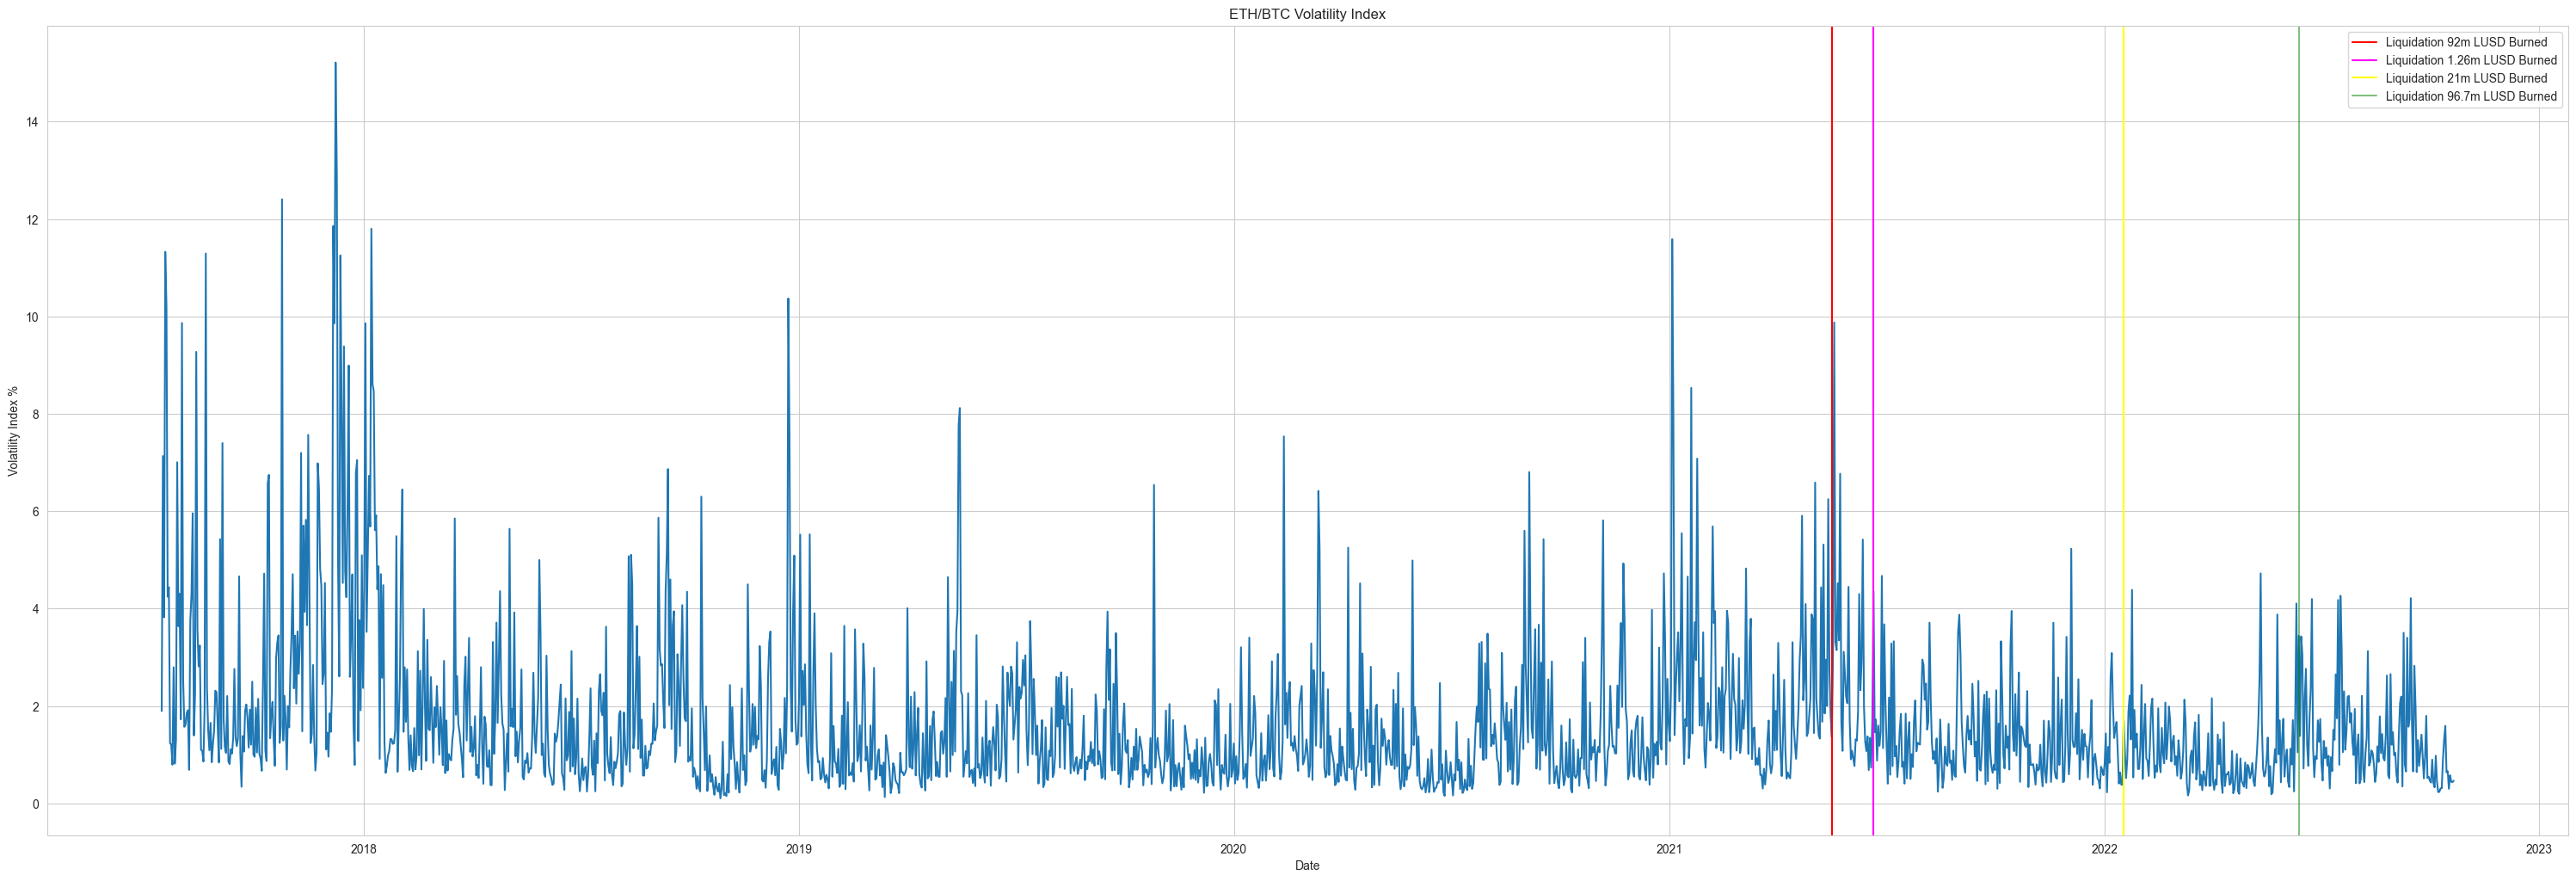

In [115]:
df_daily_prices = df_ethbtc.groupby([df_ethbtc.index.date])['close']
number_of_periods = 10
step = 24 * 60 / number_of_periods
volatilities = []
dates = []
for date, prices in df_daily_prices:
    dates.append(date)
    deviations_thru_the_day = []
    price_points = range(0, len(prices), 1)
    for price_ix in price_points:
        deviation = ((prices[0] - prices[price_ix]) / prices[0] * 100) ** 2
        deviations_thru_the_day.append(deviation)

    variance = sum(deviations_thru_the_day) / len(price_points)
    volatility = sqrt(variance)
    volatilities.append(volatility)
datasets = []
for date, volatility in zip(dates, volatilities):
    datasets.append([date, volatility])
ethbtc_final_df = pd.DataFrame(data=datasets, columns=["Date", "Volatility Index"])
fig, ax = plt.subplots()

fig.tight_layout()
ax.plot(ethbtc_final_df['Date'], ethbtc_final_df["Volatility Index"])
ax.axvline(pd.Timestamp('2021-05-17'),color='red', alpha=1, label='Liquidation 92m LUSD Burned')
ax.axvline(pd.Timestamp('2021-06-21'),color='magenta', alpha=1, label='Liquidation 1.26m LUSD Burned')
ax.axvline(pd.Timestamp('2022-01-17'),color='yellow', alpha=1, label='Liquidation 21m LUSD Burned')
ax.axvline(pd.Timestamp('2022-06-13'),color='green', alpha=.5, label='Liquidation 96.7m LUSD Burned')
ax.legend()
ax.set_title('ETH/BTC Volatility Index')
ax.set_ylabel('Volatility Index %')
ax.set_xlabel('Date')
plt.show()

## ETH-USDC Pair

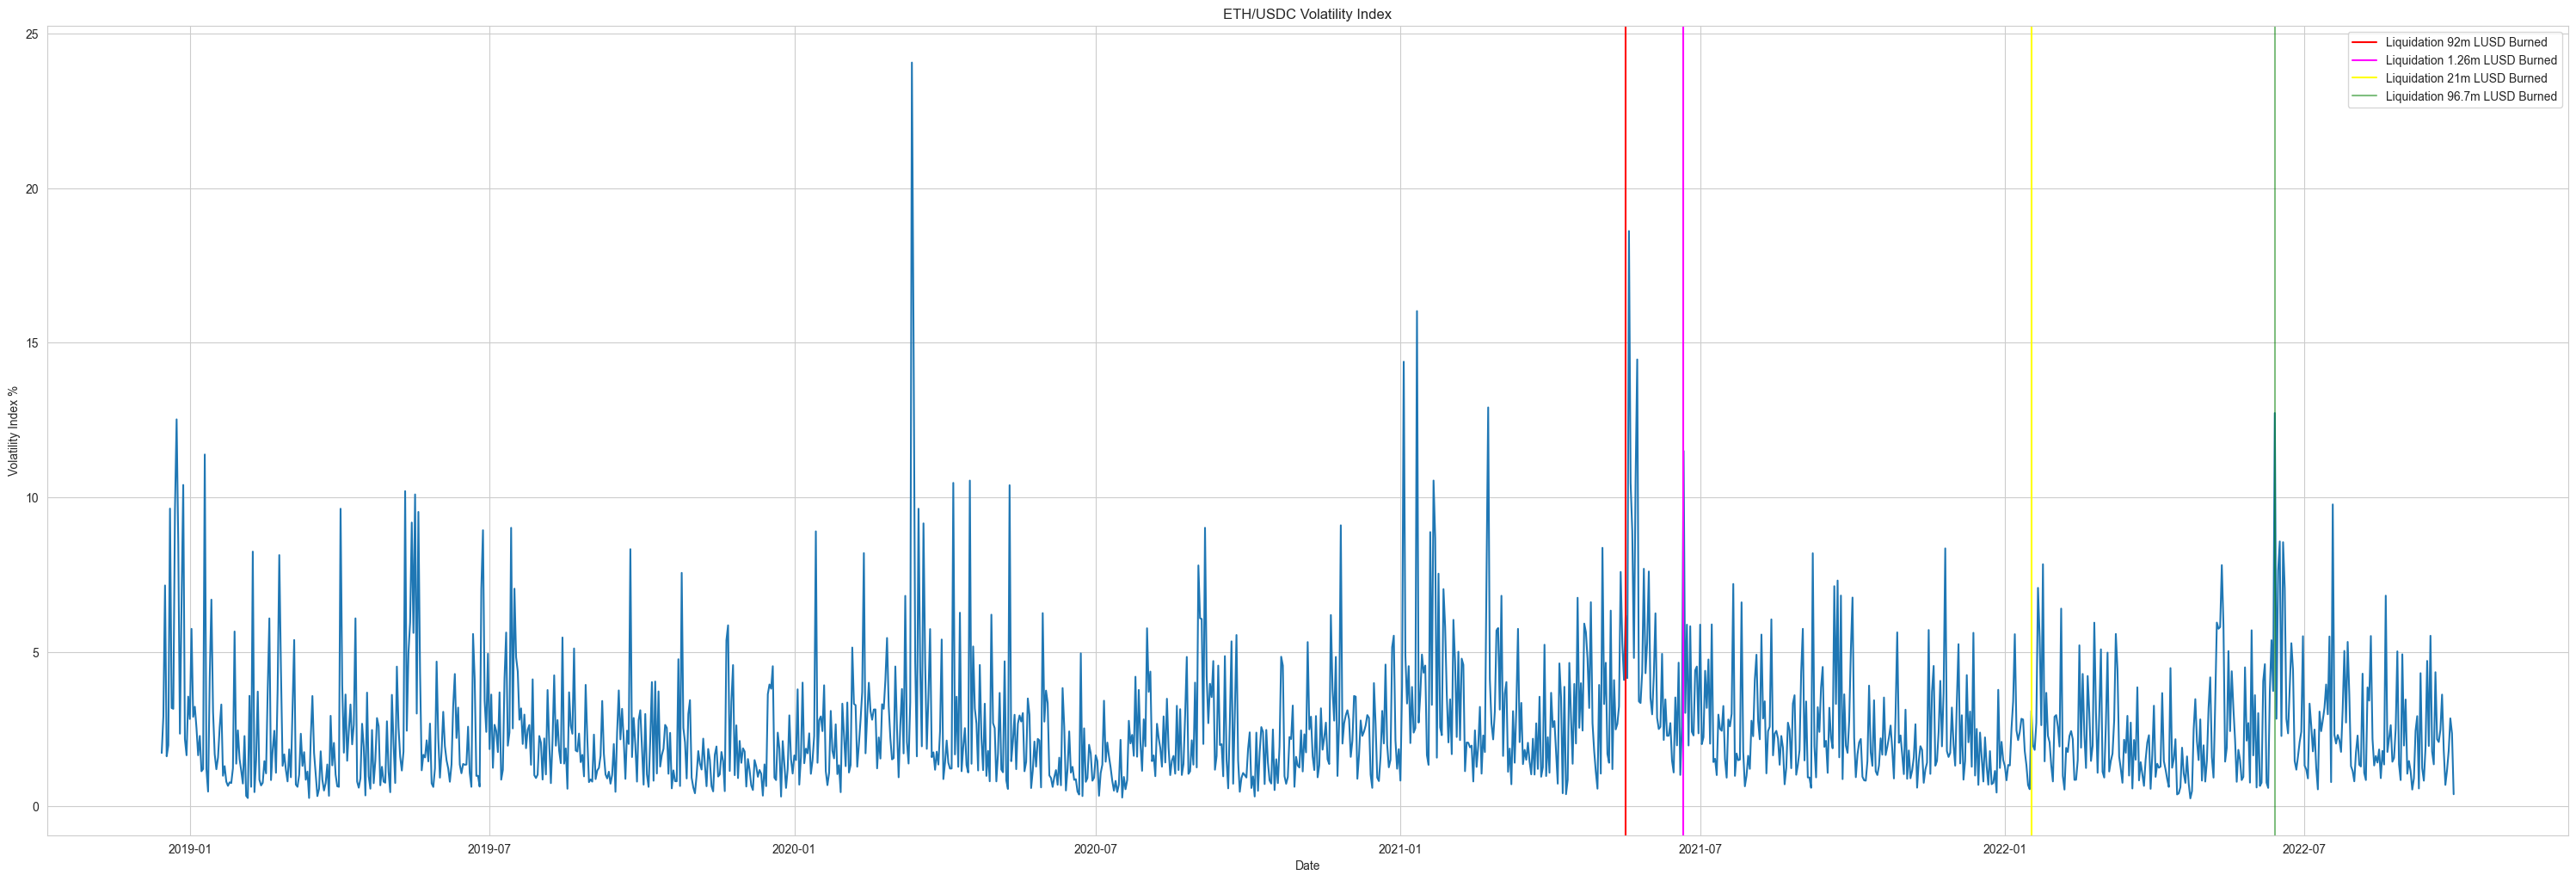

In [116]:
df_daily_prices = df_ethusdc.groupby([df_ethusdc.index.date])['close']
number_of_periods = 10
step = 24 * 60 / number_of_periods
volatilities = []
dates = []
for date, prices in df_daily_prices:
    dates.append(date)
    deviations_thru_the_day = []
    price_points = range(0, len(prices), 1)
    for price_ix in price_points:
        deviation = ((prices[0] - prices[price_ix]) / prices[0] * 100) ** 2
        deviations_thru_the_day.append(deviation)

    variance = sum(deviations_thru_the_day) / len(price_points)
    volatility = sqrt(variance)
    volatilities.append(volatility)
datasets = []
for date, volatility in zip(dates, volatilities):
    datasets.append([date, volatility])
ethusd_final_df = pd.DataFrame(data=datasets, columns=["Date", "Volatility Index"])
fig, ax = plt.subplots()
fig.tight_layout()
ax.plot(ethusd_final_df['Date'], ethusd_final_df["Volatility Index"])
ax.axvline(pd.Timestamp('2021-05-17'),color='red', alpha=1, label='Liquidation 92m LUSD Burned')
ax.axvline(pd.Timestamp('2021-06-21'),color='magenta', alpha=1, label='Liquidation 1.26m LUSD Burned')
ax.axvline(pd.Timestamp('2022-01-17'),color='yellow', alpha=1, label='Liquidation 21m LUSD Burned')
ax.axvline(pd.Timestamp('2022-06-13'),color='green', alpha=.5, label='Liquidation 96.7m LUSD Burned')
ax.legend()
ax.set_title('ETH/USDC Volatility Index')
ax.set_ylabel('Volatility Index %')
ax.set_xlabel('Date')
plt.show()